<a href="https://colab.research.google.com/github/MackPreston/iot-traffic-analysis/blob/main/notebooks/tran_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix

In [43]:
%store -r mixed_flows
%store -r features
%store -r test_loss

y = mixed_flows.is_attack
X = mixed_flows[features]

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

classifier = LinearSVC(random_state = 0)
classifier.fit(X_train,Y_train)

print_score(classifier, X_train, Y_train, X_test, Y_test, train=True)
print_score(classifier, Y_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 68.87%
_______________________________________________
CLASSIFICATION REPORT:
                  False          True  accuracy     macro avg  weighted avg
precision      0.637526      0.806061  0.688693      0.721793      0.721313
recall         0.882908      0.492249  0.688693      0.687579      0.688693
f1-score       0.740416      0.611230  0.688693      0.675823      0.676192
support    18857.000000  18643.000000  0.688693  37500.000000  37500.000000
_______________________________________________
Confusion Matrix: 
 [[16649  2208]
 [ 9466  9177]]

Test Result:
Accuracy Score: 68.37%
_______________________________________________
CLASSIFICATION REPORT:
                 False         True  accuracy     macro avg  weighted avg
precision     0.626810     0.810545   0.68368      0.718678      0.720251
recall        0.880677     0.493314   0.68368      0.686996      0.683680
f1-score      0.732368     0.613339   0.68368      0.672853      0.671834
support  

D:\Anaconda3\envs\hello-tf\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


pca = PCA(n_components=2)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = LinearSVC(random_state = 0)
classifier.fit(X_train,Y_train)

print_score(classifier, X_train, Y_train, X_test, Y_test, train=True)
print_score(classifier, Y_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 50.29%
_______________________________________________
CLASSIFICATION REPORT:
                  False          True  accuracy     macro avg  weighted avg
precision      0.505698      0.500000  0.502853      0.502849      0.502865
recall         0.503633      0.502065  0.502853      0.502849      0.502853
f1-score       0.504663      0.501030  0.502853      0.502847      0.502857
support    18857.000000  18643.000000  0.502853  37500.000000  37500.000000
_______________________________________________
Confusion Matrix: 
 [[9497 9360]
 [9283 9360]]

Test Result:
Accuracy Score: 50.87%
_______________________________________________
CLASSIFICATION REPORT:
                 False         True  accuracy     macro avg  weighted avg
precision     0.500160     0.517280   0.50872      0.508720      0.508867
recall        0.508872     0.508573   0.50872      0.508723      0.508720
f1-score      0.504478     0.512890   0.50872      0.508684      0.508756
support    61

D:\Anaconda3\envs\hello-tf\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Second Principal Component')

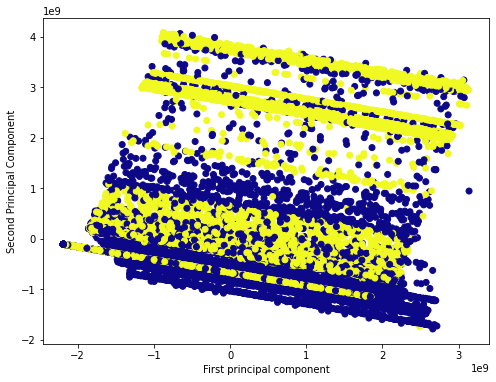

In [40]:
import pylab as pl

for i in range(0, X_train.shape[0]):
    if Y_train[i] == 0:
        c1 = pl.scatter(X_train[i,0],X_train[i,1],c='r',s=50,marker='+')
    elif Y_train[i] == 1:
        c2 = pl.scatter(X_train[i,0],X_train[i,1],c='g',s=50,marker='o')
    pl.legend([c1, c2], ['Benign', 'Attack'])
x_min, x_max = X_train[:, 0].min() - 1,   X_train[:,0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1,   X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = classifier.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()

In [ ]:
# pca_over_svm visualization
from sklearn import svm

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_train, Y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, Y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, Y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, Y_train)

# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()